# Intro to Astropy

## Importing astropy

You could import all of astropy, which is a huge, huge library, but it is not recommended! Ideally you import a subpackage or a class within the subpackage that is relevant to the operations of the script at hand, which is what we'll be doing in the rest of the notebook

## Quantities

First go through the slides for an introduction, and then attempt the following problem:

Calculate the gravitational force between a 3 solar mass star and its 10 Jupiter mass planet 2 au away. 

In [1]:
# import the subpackages to save quantities as objects with units and have pre-defined constants
import astropy.units as u
import astropy.constants as c

### Examples with astropy.units

In [2]:
# create a velocity 
q = 15.1 * u.meter / (32.0 * u.second)
print(q.value)
print(q.unit)

0.471875
m / s


In [3]:
# create convert units
x = 1.0 * u.parsec
x.to(u.km)  

<Quantity 3.08567758e+13 km>

### Examples with astropy.constants

In [4]:
# what does a constant object entail?
print(c.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


### DIY

In [5]:
#masses with units of M_sun and M_jub

#distance with unit of au

#Calculate gravitational force using masses distance and the gravitational constant G


## Input and Output

### Tables

Look at the slide for information

### FITS

In [6]:
fits_img_fn

NameError: name 'fits_img_fn' is not defined

In [7]:
# import i/o subpackage for reading FITS files
from astropy.io import fits

# Get path for data that came with astropy installation
fits_img_fn = fits.util.get_testdata_filepath('test0.fits')

# open HDU object for file and see what it contains
hdul = fits.open(fits_img_fn) # header data unit (HDU) list
hdul.info()

Filename: c:\Users\rana_\anaconda3\Lib\site-packages\astropy\io\fits\tests\data\test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [8]:
# what does the data look like? how do you "get data" from the file?

# fits.getdata

# hdul[1].data


## Planning Observations

Planning observations takes into account the targets, dates and times, location of observing, moon cycle, etc.

### Example: Looking at Fomalhaut

Here's a simple start-- You have to plan an observation of Fomalhaut from Subaru.

#### Step 1:  
The first step is to generate the coordinates of the star and the observing site. The packages here are a hint


In [12]:
!pip install astroplan

     ---------------------------------------- 0.0/140.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/140.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/140.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/140.4 kB ? eta -:--:--
     -------- ---------------------------- 30.7/140.4 kB 145.2 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/140.4 kB 145.2 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/140.4 kB 145.2 kB/s eta 0:00:01
     --------------------- --------------- 81.9/140.4 kB 269.5 kB/s eta 0:00:01
     --------------------- --------------- 81.9/140.4 kB 269.5 kB/s eta 0:00:01
     ---------------------------- ------- 112.6/140.4 kB 273.1 kB/s eta 0:00:01
     ---------------------------- ------- 112.6/140.4 kB 273.1 kB/s eta 0:00:01
     ------------------------------------ 140.4/140.4 kB 297.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build depen

In [13]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer

# get coordinates of fomalhaut

# get observatory info and store its coordinates as an EarthLocation

#### Step 2:

Visualise and plot its visibility on a date of your choice

In [14]:
fomalhaut = SkyCoord.from_name('Fomalhaut')
subaru = Observer.at_site('Subaru', timezone ='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)
print(f'Sky Coords of Fomalhaut: {fomalhaut} and Geocentric Coords of Subaru: {subaru_loc}')

Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)> and Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


In [15]:
# determine position for a give date: Let's say Jul 31 2024
from astropy.time import Time
# coz you'll need this
import numpy as np

# define midnight 
midnight = Time('2024-07-31 00:00:00')
# Define grid of times to calculate position over:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour 
times = midnight + delta_midnight

# Set up AltAz reference frame for these times and location
frame= AltAz(obstime=times, location=subaru_loc)

# Now we transform the Fomalhaut object to the Altitute/Azimuth coordinate system
fomalhaut_altaz = fomalhaut.transform_to(frame)

In [16]:
# now... can we see this source at night? this would depend on where the sun is
from astropy.coordinates import get_sun



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

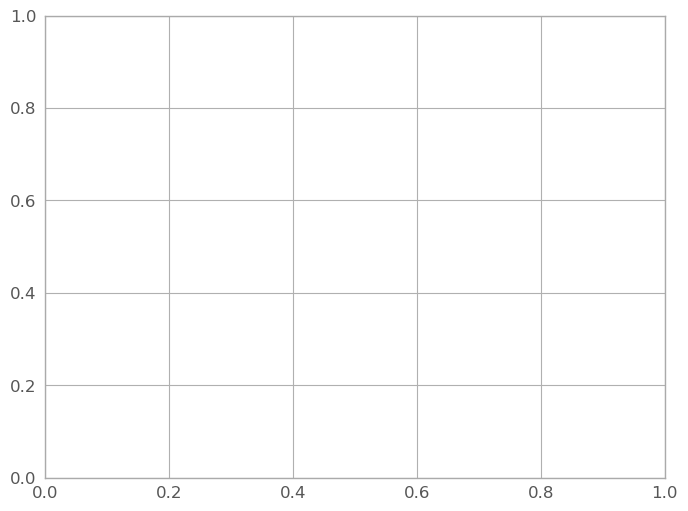

In [20]:
# for plotting
import matplotlib.pyplot as plt

# astropy's visualisation tool
from astropy.visualization import astropy_mpl_style


plt.style.use(astropy_mpl_style)

plt.figure()

# Plot the sun altitude


# Plot Fomalhaut's alt/az - use a colour map to represent azimuth. Scatter plot is advises


# Now plot the range when the sun is below the horizon, and at least 18 degrees below 
# the horizon - this shows the range of twilight (-0 to -18 deg) and night (< -18 deg)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < 0*u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < -18*u.deg, color='0.4', zorder=0)

#now for the details
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(20, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()


Text(0.5, 1.0, 'Sun Altitude vs Time')

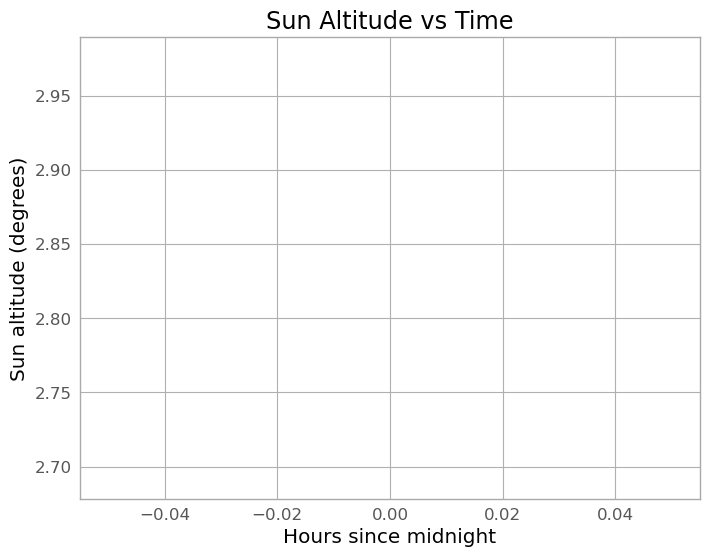

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, AltAz, get_sun
from astropy.time import Time
from astroplan import Observer

#
# Get the sun's altitude angle
sun_altaz = observer.altaz(time, get_sun(time))
sun_altitude = sun_altaz.alt

# Create a time array to match the sun_altitude value
delta_midnight = time - Time('2024-08-10 00:00:00', format='iso', scale='utc')

plt.figure()
plt.plot(delta_midnight.to('hr').value, sun_altitude.to('deg'))
plt.xlabel('Hours since midnight')
plt.ylabel('Sun altitude (degrees)')
plt.title('Sun Altitude vs Time')